# Final Thesis Project - Training Data

This Notebook tests out different ML models and check the scores. 

The training dataset contains a total of ? samples. 

In [21]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.style.use('bmh')

In [22]:
import os
print(os.getcwd())

C:\Users\edward.luca\Github\PlethMachineLearning


In [23]:
# Loading Data
data_train = np.load('data_train.npy', allow_pickle=True)
labels_train = np.load('labels_train.npy', allow_pickle=True)

print(data_train.shape, labels_train.shape)

(342, 27) (342,)


In [24]:
# Labels Encoding

labels_names = []

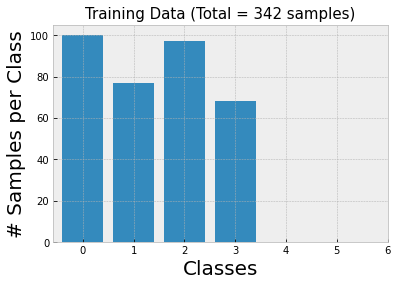

In [25]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[0])+' samples)',size=15);



In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from skimage.transform import resize
from sklearn.svm import SVC
#import cv2

In [27]:
X_train, X_test, t_train, t_test = train_test_split(data_train, labels_train, 
                                                   test_size=0.2,
                                                   stratify=labels_train,
                                                   random_state=0)
print(X_train.shape)
print(t_train.shape)
print(X_test.shape)
print(t_test.shape)

(273, 27)
(273,)
(69, 27)
(69,)


---

## 1.) LDA + LOGISTIC REGRESSION (Model No.1)

In [28]:
mod1 = Pipeline([('SCALER', StandardScaler()),
                 ('LDA', LDA(n_components=3)),
                 ('LOGRES', LogisticRegression())])
mod1.fit(X_train, t_train)



Pipeline(steps=[('SCALER', StandardScaler()),
                ('LDA', LinearDiscriminantAnalysis(n_components=3)),
                ('LOGRES', LogisticRegression())])

In [29]:
##########################   RUN GRIDSEARCHCV ON ALL    ##############################

In [30]:
pred_test1 = mod1.predict(X_test)

In [31]:
print('LR\n')
print('Accuracy:\n',accuracy_score(t_test, pred_test1))
print ('F1_score:\n',f1_score(t_test, pred_test1, average=None))
print('Confusion matrix:\n',confusion_matrix(t_test, pred_test1))

LR

Accuracy:
 0.9710144927536232
F1_score:
 [0.95       1.         0.97435897 0.96551724]
Confusion matrix:
 [[19  0  0  1]
 [ 0 15  0  0]
 [ 1  0 19  0]
 [ 0  0  0 14]]


## 2.) PCA + LOGISTIC REGRESSION (Model No. 2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64),)
0.9999999983446723


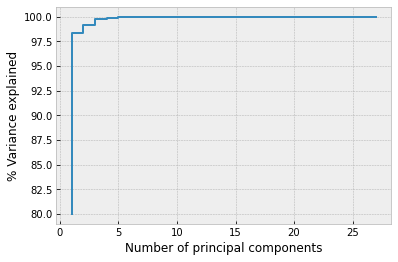

In [32]:
N, D = np.shape(X_train)
pca = PCA(n_components=min(N,D))
pca.fit(X_train)

plt.step(range(1,min(N,D)+1),np.cumsum(pca.explained_variance_ratio_)*100)

print(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9))
print(np.cumsum(pca.explained_variance_ratio_)[20])
plt.xlabel('Number of principal components');
plt.ylabel('% Variance explained');

In [33]:
mod2 = Pipeline([('SCALER', StandardScaler()),
                 ('PCA', PCA(n_components=26)),
                 ('LOGREG', LogisticRegression(random_state=0, tol=0.01))]) 

In [34]:
mod2.fit(X_train, t_train)

Pipeline(steps=[('SCALER', StandardScaler()), ('PCA', PCA(n_components=26)),
                ('LOGREG', LogisticRegression(random_state=0, tol=0.01))])

In [35]:
pred_test2 = mod2.predict(X_test)

print('With PCA:')
print('Test Accuracy Score = ',accuracy_score(t_test, pred_test2))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test2))


With PCA:
Test Accuracy Score =  0.9710144927536232
Confusion matrix:
[[19  0  0  1]
 [ 0 15  0  0]
 [ 1  0 19  0]
 [ 0  0  0 14]]


## 3.) Random Forest (Model No. 3)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [38]:
# Train the classifier on the training data
rf_classifier.fit(X_train, t_train)

RandomForestClassifier(random_state=0)

In [39]:
pred_test3 = rf_classifier.predict(X_test)

print('With Random Forest:')
print('Test Accuracy Score = ',accuracy_score(t_test, pred_test3))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test3))

With Random Forest:
Test Accuracy Score =  0.9855072463768116
Confusion matrix:
[[19  0  0  1]
 [ 0 15  0  0]
 [ 0  0 20  0]
 [ 0  0  0 14]]


## 4.) XGBoost (Model No.4)

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

In [41]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=0)

In [42]:
# Train the classifier on the training data
xgb_classifier.fit(X_train, t_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [43]:
pred_test4 = xgb_classifier.predict(X_test)

print('With XGBoost:')
print('Test Accuracy Score = ',accuracy_score(t_test, pred_test4))
print('Confusion matrix:')
print(confusion_matrix(t_test, pred_test4))

With XGBoost:
Test Accuracy Score =  1.0
Confusion matrix:
[[20  0  0  0]
 [ 0 15  0  0]
 [ 0  0 20  0]
 [ 0  0  0 14]]


## 5.) CNN (Model No. 5)

In [42]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train_corrected.npy')

X_train_full.shape, t_train_full.shape

((5933, 270000), (5933,))

In [7]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

((5043, 270000), (5043,), (4034, 270000), (4034,), (1009, 270000), (1009,))

In [8]:
del X_train_full, t_train_full
# free up space

In [9]:

X_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0

X_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0

X_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0

X_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300,300,3]), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
             metrics=['accuracy'])

In [11]:
model.fit(X_train, t_train, epochs=2, batch_size=32,
          validation_data=(X_val, t_val),
         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/2
127/127 [==============================] - 329s 3s/step - loss: 7.6946 - accuracy: 0.1004 - val_loss: 2.3032 - val_accuracy: 0.0991
Epoch 2/2
127/127 [==============================] - 324s 3s/step - loss: 2.3043 - accuracy: 0.0910 - val_loss: 2.3029 - val_accuracy: 0.1011


In [12]:
model.evaluate(X_test, t_test)

28/28 [==============================] - 13s 477ms/step - loss: 2.3029 - accuracy: 0.1011


[2.3029372692108154, 0.10112359374761581]

## 6) Pre-trained CNN Model Using ResNet without Regularization (Model No. 6)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import tensorflow as tf
from tensorflow import keras

In [14]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train_corrected.npy')

X_train_full.shape, t_train_full.shape

((5933, 270000), (5933,))

In [15]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

((5043, 270000), (5043,), (4034, 270000), (4034,), (1009, 270000), (1009,))

In [16]:
X_training_reshaped = X_training.reshape(-1, 300, 300, 3)
X_test_reshaped = X_test.reshape(-1, 300, 300, 3)

# Reshape the input data to match the model's expected input shape
X_train_reshaped = X_train.reshape(-1, 300, 300, 3)
X_val_reshaped = X_val.reshape(-1, 300, 300, 3)

In [17]:
base_model = keras.applications.resnet50.ResNet50(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

nn.Linear(numFeatures, 512),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, len(trainDS.classes))
        # nn.Softmax(dim=1)

In [19]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [20]:
# Freeze base model
base_model.trainable = False

In [21]:
IMG_SIZE = 150

# .Input() instantiates a Keras tensor
inputs = keras.Input(shape=(300, 300, 3))
# Input layer

inputs_resized = tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)
# resizing input to match pretrained model

x = base_model(inputs_resized, training=False)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

In [22]:
inputs.shape, inputs_resized.shape, x.shape

(TensorShape([None, 300, 300, 3]),
 TensorShape([None, 150, 150, 3]),
 TensorShape([None, 5, 5, 2048]))

In [24]:
#Flattening

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_flatten = keras.layers.Flatten()(x)

x_flatten.shape

TensorShape([None, 51200])

In [25]:
# A Dense classifier with 10 units and softmax activation function
outputs = keras.layers.Dense(10, activation='softmax')(x_flatten)

model = keras.Model(inputs, outputs)

In [26]:
type(model)

keras.engine.functional.Functional

In [27]:
inputs.shape, inputs_resized.shape, x.shape, outputs.shape

(TensorShape([None, 300, 300, 3]),
 TensorShape([None, 150, 150, 3]),
 TensorShape([None, 5, 5, 2048]),
 TensorShape([None, 10]))

In [28]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

model.fit(X_train_reshaped,t_train, epochs=5, batch_size=32,
          validation_data=(X_val_reshaped, t_val),
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

# Again, in practice, you would run for a lot more epochs. 
# As well as perform the necessary hyperparameter tuning.

Epoch 1/5
127/127 [==============================] - 112s 842ms/step - loss: 643.4494 - accuracy: 0.3265 - val_loss: 1053.8110 - val_accuracy: 0.2319
Epoch 2/5
127/127 [==============================] - 111s 877ms/step - loss: 403.5866 - accuracy: 0.4958 - val_loss: 1754.6864 - val_accuracy: 0.1903
Epoch 3/5
127/127 [==============================] - 107s 841ms/step - loss: 329.6902 - accuracy: 0.5885 - val_loss: 927.3879 - val_accuracy: 0.2963
Epoch 4/5
127/127 [==============================] - 106s 839ms/step - loss: 236.7023 - accuracy: 0.6490 - val_loss: 561.5453 - val_accuracy: 0.4281
Epoch 5/5
127/127 [==============================] - 106s 839ms/step - loss: 193.1102 - accuracy: 0.7035 - val_loss: 3759.5913 - val_accuracy: 0.1308


In [29]:
model.evaluate(X_test_reshaped, t_test)

28/28 [==============================] - 20s 707ms/step - loss: 3681.6174 - accuracy: 0.1337


[3681.617431640625, 0.13370786607265472]

In [30]:
# label predictions
y_test = np.argmax(model.predict(X_test_reshaped),axis=1)

y_test.shape

28/28 [==============================] - 21s 713ms/step


(890,)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(t_test, y_test, target_names=labels_names))

               precision    recall  f1-score   support

         Nike       1.00      0.02      0.04        90
       Adidas       0.00      0.00      0.00        88
         Ford       0.86      0.07      0.13        88
        Honda       0.67      0.09      0.16        88
General Mills       0.00      0.00      0.00        90
     Unilever       1.00      0.01      0.02        91
   McDonald's       0.10      1.00      0.19        88
          KFC       1.00      0.02      0.04        88
       Gators       0.86      0.14      0.24        88
           3M       0.00      0.00      0.00        91

     accuracy                           0.13       890
    macro avg       0.55      0.14      0.08       890
 weighted avg       0.55      0.13      0.08       890



C:\Users\renii\.conda\envs\EEE4773\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renii\.conda\envs\EEE4773\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renii\.conda\envs\EEE4773\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7) Pre-trained CNN Model Using ResNet with Regularization (Model No.7)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(
    seed=0
)

###  Data Augmentation

Tutorial on Data Augmentation:
https://www.tensorflow.org/tutorials/images/data_augmentation

In [4]:
def visualize(image, label):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title(label)
  plt.imshow(image/255.0)
    
    

def visualize_both(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented/255.)

In [6]:
X_train_reshaped = X_train.reshape(-1, 300, 300, 3)
X_val_reshaped = X_train.reshape(-1, 300, 300, 3)

In [7]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal"),
  keras.layers.RandomRotation(0.2),
  keras.layers.RandomBrightness(0.3),
  keras.layers.RandomContrast(0.4),
  #keras.layers.RandomCrop(height=0.5,width=0.5,seed=0),
  keras.layers.RandomZoom(height_factor=0.5,width_factor=0.5,seed=0),
  #keras.layers.RandomWidth(),
])

In [29]:
X_train_sample = X_train_reshaped
t_train_sample = t_train

#X_train_sample = X_train_reshaped[0,:,:,:]
#t_train_sample = t_train[0]

t_train_append = np.append(t_train_sample,t_train_sample)
t_train_append = np.append(t_train_append,t_train_sample)
t_train_append = np.append(t_train_append,t_train_sample)
t_train_append = np.append(t_train_append,t_train_sample)

t_train_append.shape

(20170,)

In [10]:
#for i in range(t_train_append.shape[0]):
#    print(t_train_append[i])

In [11]:
def return_augmented_dataset(dataset):
    augmented_dataset =data_augmentation(dataset)
    augmented_dataset_numpy = augmented_dataset.numpy()
    return augmented_dataset_numpy

In [12]:
augmented_dataset1 = return_augmented_dataset(X_train_sample)

In [13]:
augmented_dataset2 = return_augmented_dataset(X_train_sample)

In [14]:
augmented_dataset3 = return_augmented_dataset(X_train_sample)

In [15]:
augmented_dataset4 = return_augmented_dataset(X_train_sample)

In [17]:
augmented_dataset = np.append(X_train_reshaped,augmented_dataset1, axis=0)

In [18]:
augmented_dataset = np.append(augmented_dataset,augmented_dataset2, axis=0)

In [19]:
augmented_dataset = np.append(augmented_dataset,augmented_dataset3, axis=0)

In [20]:
augmented_dataset = np.append(augmented_dataset,augmented_dataset4, axis=0)

In [28]:
augmented_dataset.shape

(20170, 300, 300, 3)

# Importing / Training Model

In [3]:
X_train_full = np.load('data_train.npy').T
t_train_full = np.load('labels_train_corrected.npy')
X_train_augmented = np.load('X_train_augmented.npy')
t_train_augmented = np.load('t_train_augmented.npy')

X_train_full.shape, t_train_full.shape

((5933, 270000), (5933,))

In [4]:
from sklearn.model_selection import train_test_split

# Training and Test sets
X_training, X_test, t_training, t_test = train_test_split(X_train_full, 
                                                  t_train_full, 
                                                  shuffle=True,
                                                  stratify=t_train_full,
                                                  test_size=0.15)
# Train and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_training, 
                                                  t_training, 
                                                  shuffle=True,
                                                  stratify=t_training,
                                                  test_size=0.2)

X_training.shape, t_training.shape, X_train.shape, t_train.shape, X_val.shape, t_val.shape

((5043, 270000), (5043,), (4034, 270000), (4034,), (1009, 270000), (1009,))

In [5]:
#X_training = X_training.reshape(X_training.shape[0], 300, 300, 3)/255.0

#X_train = X_train.reshape(X_train.shape[0], 300, 300, 3)/255.0

#X_val = X_val.reshape(X_val.shape[0], 300, 300, 3)/255.0

#X_test = X_test.reshape(X_test.shape[0], 300, 300, 3)/255.0

X_training_reshaped = X_training.reshape(-1, 300, 300, 3)
X_test_reshaped = X_test.reshape(-1, 300, 300, 3)

# Reshape the input data to match the model's expected input shape
X_train_reshaped = X_train.reshape(-1, 300, 300, 3)
X_val_reshaped = X_val.reshape(-1, 300, 300, 3)

In [6]:
base_model = keras.applications.resnet50.ResNet50(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [7]:
base_model.output_shape

(None, 5, 5, 2048)

In [8]:
#base_model.add()

In [9]:
# Freeze base model
base_model.trainable = False

In [10]:
model_seq = tf.keras.Sequential()
model_seq.add(keras.layers.Dropout(0.25))
model_seq.add(base_model)

#model_seq.add(keras.layers.Flatten())
model_seq.add(keras.layers.GlobalAveragePooling2D())

model_seq.add(keras.layers.Dropout(0.50))
model_seq.add(keras.layers.Dense(512, activation='relu'))
model_seq.add(keras.layers.Dropout(0.50))
model_seq.add(keras.layers.Dense(256, activation='relu'))
model_seq.add(keras.layers.Dropout(0.50))
model_seq.add(keras.layers.Dense(128, activation='relu'))

#model_seq.add(base_model)


In [11]:
IMG_SIZE = 150

# .Input() instantiates a Keras tensor
inputs = keras.Input(shape=(300, 300, 3))
# Input layer

inputs_resized = tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE)(inputs)
# resizing input to match pretrained model

x = model_seq(inputs_resized, training=False)
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.

In [12]:
# Option 1: Pooling

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_pooling = keras.layers.GlobalAveragePooling2D()(x)

x_pooling.shape

ValueError: Input 0 of layer "global_average_pooling2d_1" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 128)

In [13]:
# Option 2: Flattening

# Convert features of shape `base_model.output_shape[1:]` to vectors
x_flatten = keras.layers.Flatten()(x)

x_flatten.shape

TensorShape([None, 128])

In [14]:
outputs = keras.layers.Dense(10, activation='softmax')(x_flatten)

model = keras.Model(inputs, outputs)

In [15]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

model.fit(X_train_augmented,t_train_augmented, epochs=15, batch_size=32,
          validation_data=(X_val_reshaped, t_val),
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

# Again, in practice, you would run for a lot more epochs. 
# As well as perform the necessary hyperparameter tuning.

Epoch 1/15
631/631 [==============================] - 432s 678ms/step - loss: 0.5593 - accuracy: 0.8177 - val_loss: 0.2841 - val_accuracy: 0.9118
Epoch 2/15
631/631 [==============================] - 401s 635ms/step - loss: 0.2630 - accuracy: 0.9097 - val_loss: 0.3734 - val_accuracy: 0.8989
Epoch 3/15
631/631 [==============================] - 406s 643ms/step - loss: 0.1777 - accuracy: 0.9411 - val_loss: 0.1823 - val_accuracy: 0.9504
Epoch 4/15
631/631 [==============================] - 397s 629ms/step - loss: 0.1200 - accuracy: 0.9595 - val_loss: 0.2792 - val_accuracy: 0.9405
Epoch 5/15
631/631 [==============================] - 403s 639ms/step - loss: 0.0945 - accuracy: 0.9682 - val_loss: 0.2525 - val_accuracy: 0.9485


In [16]:
model.evaluate(X_test_reshaped, t_test)

28/28 [==============================] - 16s 577ms/step - loss: 0.1197 - accuracy: 0.9674


[0.11972300708293915, 0.9674157500267029]

In [17]:
# label predictions
y_test = np.argmax(model.predict(X_test_reshaped),axis=1)

y_test.shape

28/28 [==============================] - 18s 601ms/step


(890,)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(t_test, y_test, target_names=labels_names))

               precision    recall  f1-score   support

         Nike       0.96      0.98      0.97        90
       Adidas       0.99      0.95      0.97        88
         Ford       0.99      0.98      0.98        88
        Honda       0.98      0.99      0.98        88
General_mills       0.98      0.98      0.98        90
     Unilever       0.96      1.00      0.98        91
    Mcdonalds       0.98      0.94      0.96        88
          KFC       0.99      0.92      0.95        88
       Gators       0.91      0.97      0.94        88
           3M       0.96      0.97      0.96        91

     accuracy                           0.97       890
    macro avg       0.97      0.97      0.97       890
 weighted avg       0.97      0.97      0.97       890



In [19]:
model.save('final_model.h5')